In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.simplefilter(action='ignore', category=MatplotlibDeprecationWarning)


In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [114]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [115]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [116]:
df.shape

(397, 7)

In [117]:
df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [119]:
df.isnull().sum()

,0
Unnamed: 0,0
rank,0
discipline,0
yrs.since.phd,0
yrs.service,0
sex,0
salary,0


In [120]:
df.isnull()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
392,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False


In [121]:
df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [122]:
print(df.isnull().sum())

Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


In [123]:
df['salary'].mean()

np.float64(113706.45843828715)

In [124]:
df.groupby('sex')['salary'].mean()

,salary
sex,
Female,101002.410256
Male,115090.418994


In [125]:
df.groupby('rank')['salary'].mean()

,salary
rank,
AssocProf,93876.437500
AsstProf,80775.985075
Prof,126772.109023


In [126]:
df=df.rename(columns={'yrs.service':'year_of_service', 'yrs.since.phd':'year_since_phd', 'Unnamed: 0':'serial_number', 'rank':'job_title'})
df

,serial_number,job_title,discipline,year_since_phd,year_of_service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [127]:
df[df['job_title'].str.contains('Prof')].describe()

,serial_number,year_since_phd,year_of_service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


<Axes: xlabel='sex'>

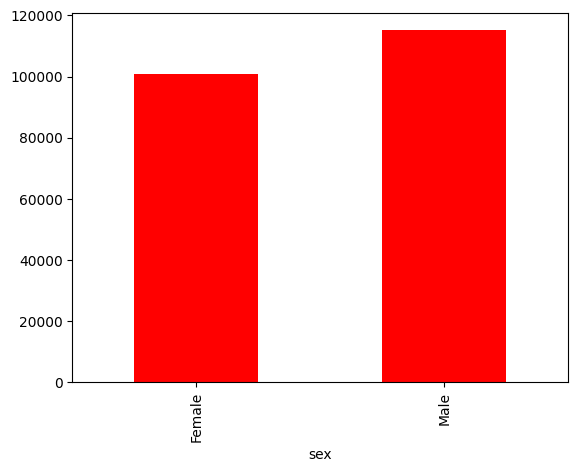

In [128]:
# build a bar chart to compare salaries by gender
df.groupby('sex')['salary'].mean().plot(kind='bar', color='red')

<Axes: xlabel='job_title'>

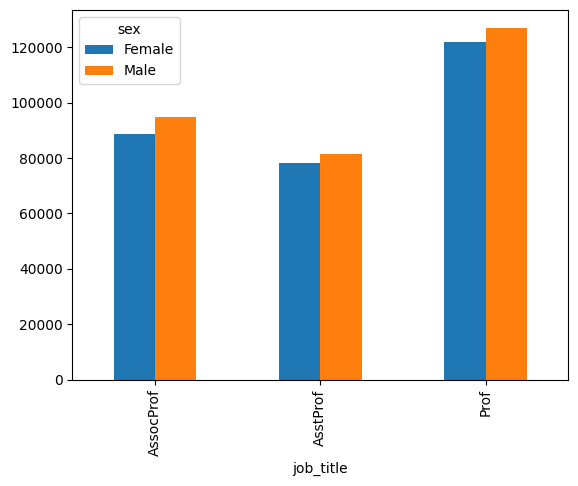

In [130]:
# build a bar chart to compare salaries by rank and gender
df.groupby(['job_title','sex'])['salary'].mean().unstack().plot(kind='bar')

<Axes: ylabel='salary'>

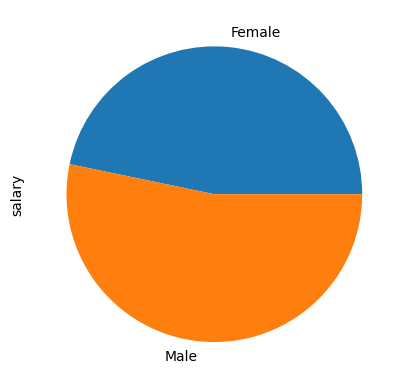

In [131]:
# pie chart to compare gender inequality in salaries
df.groupby('sex')['salary'].mean().plot(kind='pie')

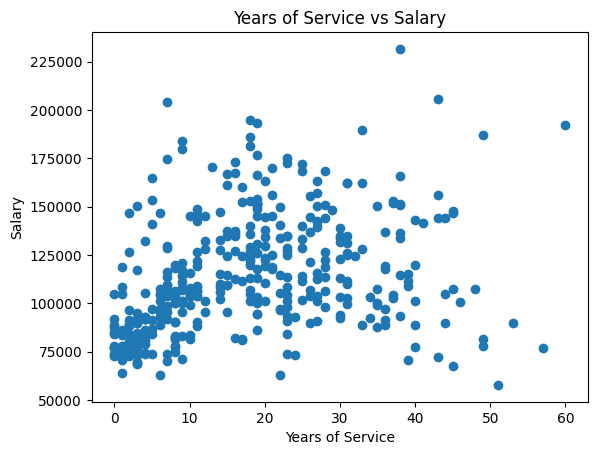

The correlation between years of service and salary is: 0.3347446756998623


In [132]:
# correlation between years of service and salary

plt.scatter(df['year_of_service'], df['salary'])
plt.xlabel('Years of Service')
plt.ylabel('Salary')
plt.title('Years of Service vs Salary')
plt.show()

correlation = df['year_of_service'].corr(df['salary'])
print(f"The correlation between years of service and salary is: {correlation}")


In [133]:
# count female and male employees

print(df['sex'].value_counts())


sex
Male      358
Female     39
Name: count, dtype: int64


The analysis of the dataset, comprising 397 employees, reveals a significant gender disparity, with only 39 female employees compared to a considerably larger number of male employees. This clear underrepresentation of women, constituting approximately 10% of the workforce, indicates a substantial gender gap requiring further investigation and action.

In [134]:
# rank distribution for female employees
female_rank_counts = df[df['sex'] == 'Female']['job_title'].value_counts()

female_rank_counts


,count
job_title,
Prof,18
AsstProf,11
AssocProf,10


In [135]:
# years of service for female prof

female_profs = df[(df['sex'] == 'Female') & (df['job_title'] == 'Prof')]
print(female_profs['year_of_service'])


9      18
19     36
47     19
48     25
68     17
84     18
103    14
114     0
148    26
230    27
233    19
245    11
254     7
323    15
332    10
341    17
358    14
361    15
Name: year_of_service, dtype: int64


In [136]:
# count male professors
male_prof_count = len(df[(df['sex'] == 'Male') & (df['job_title'] == 'Prof')])
print(f"The number of male professors is: {male_prof_count}")


The number of male professors is: 248


In [137]:
# years of service for male professors
male_profs = df[(df['sex'] == 'Male') & (df['job_title'] == 'Prof')]
print(male_profs['year_of_service'])


0      18
1      16
3      39
4      41
6      23
       ..
391    19
392    30
393    19
394    25
395    15
Name: year_of_service, Length: 248, dtype: int64


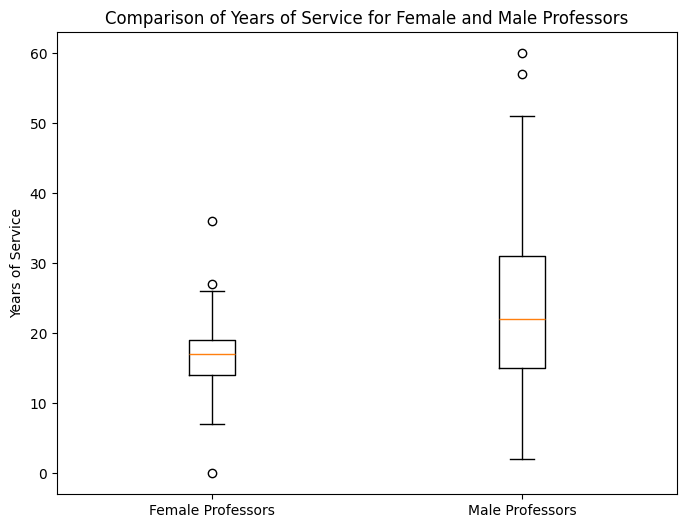

In [138]:
# Compare years of service for female and male professors

female_profs = df[(df['sex'] == 'Female') & (df['job_title'] == 'Prof')]
female_years_of_service = female_profs['year_of_service']

male_profs = df[(df['sex'] == 'Male') & (df['job_title'] == 'Prof')]
male_years_of_service = male_profs['year_of_service']

# boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([female_years_of_service, male_years_of_service], labels=['Female Professors', 'Male Professors'])
plt.ylabel('Years of Service')
plt.title('Comparison of Years of Service for Female and Male Professors')
plt.show()


The observed disparity in years of service between female and male professors suggests potential systemic barriers hindering women's career advancement in academia. Addressing these underlying issues, such as career interruptions or slower promotion rates, is crucial to fostering an inclusive environment with equal opportunities for all faculty.

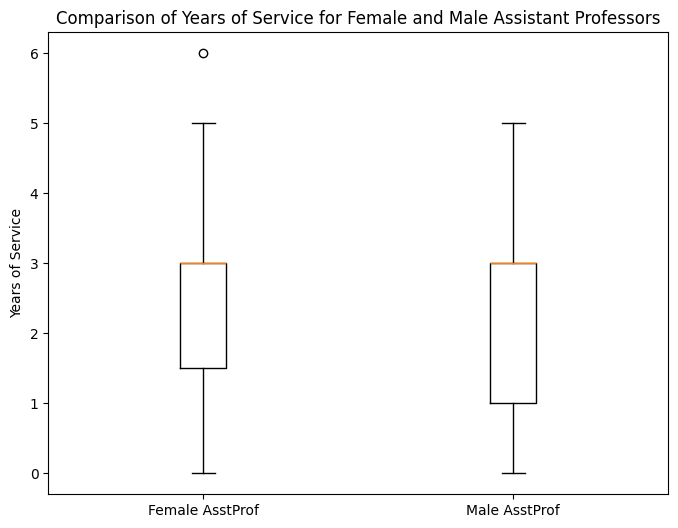

In [139]:
# compare years of service for female AsstProf and male AsstProf

female_asst_profs = df[(df['sex'] == 'Female') & (df['job_title'] == 'AsstProf')]
female_years_of_service = female_asst_profs['year_of_service']

male_asst_profs = df[(df['sex'] == 'Male') & (df['job_title'] == 'AsstProf')]
male_years_of_service = male_asst_profs['year_of_service']

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([female_years_of_service, male_years_of_service], labels=['Female AsstProf', 'Male AsstProf'])
plt.ylabel('Years of Service')
plt.title('Comparison of Years of Service for Female and Male Assistant Professors')
plt.show()


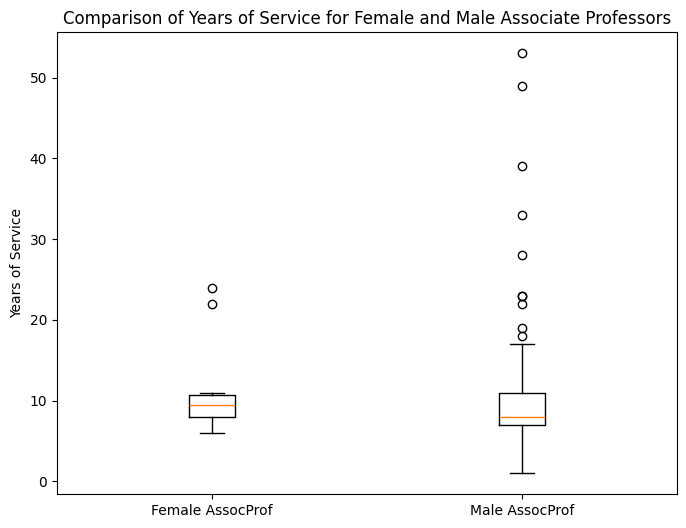

In [140]:
# compare years of service for female AssocProf and male AssocProf

female_assoc_profs = df[(df['sex'] == 'Female') & (df['job_title'] == 'AssocProf')]
female_years_of_service = female_assoc_profs['year_of_service']

male_assoc_profs = df[(df['sex'] == 'Male') & (df['job_title'] == 'AssocProf')]
male_years_of_service = male_assoc_profs['year_of_service']

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([female_years_of_service, male_years_of_service], labels=['Female AssocProf', 'Male AssocProf'])
plt.ylabel('Years of Service')
plt.title('Comparison of Years of Service for Female and Male Associate Professors')
plt.show()


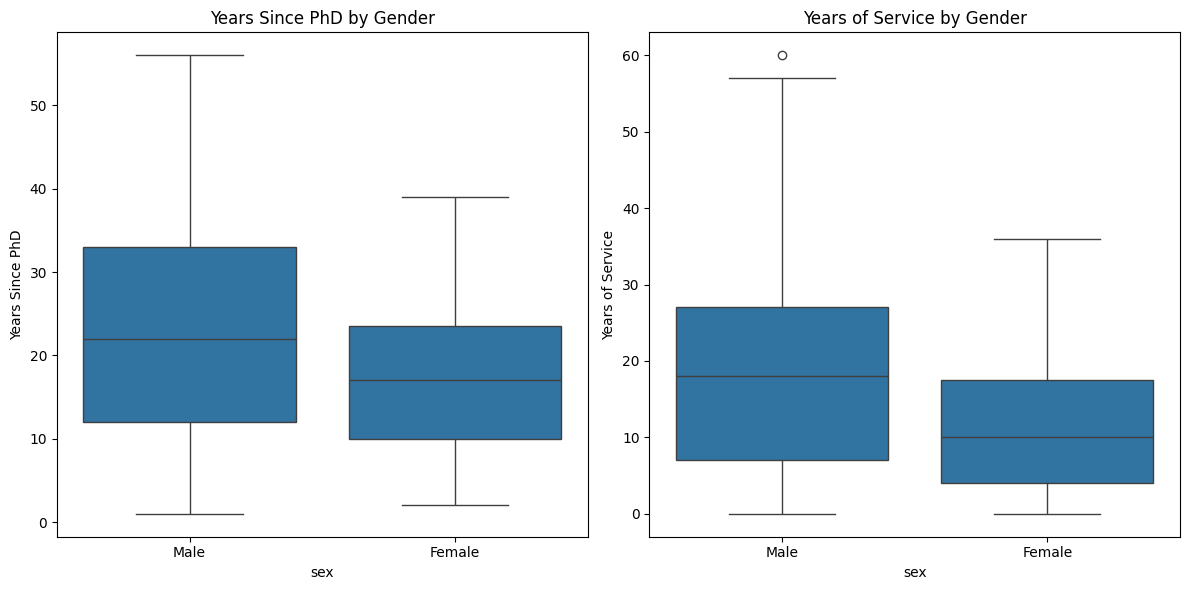

In [141]:
# compare yrs.since.phd and yrs.service for male and female employees

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Years since PhD
sns.boxplot(ax=axes[0], x='sex', y='year_since_phd', data=df)
axes[0].set_title('Years Since PhD by Gender')
axes[0].set_ylabel('Years Since PhD')

# Years of service
sns.boxplot(ax=axes[1], x='sex', y='year_of_service', data=df)
axes[1].set_title('Years of Service by Gender')
axes[1].set_ylabel('Years of Service')

plt.tight_layout()
plt.show()
